In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

**Adding columns names to the dataset and removing sex column as it is not appropriate factor to calculate age of abalone**

In [6]:
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight", "Rings",]
abalone = abalone.drop("Sex", axis=1)

In [7]:
abalone.head()

Length  Diameter  Height  ...  Viscera weight  Shell weight  Rings
0   0.455     0.365   0.095  ...          0.1010         0.150     15
1   0.350     0.265   0.090  ...          0.0485         0.070      7
2   0.530     0.420   0.135  ...          0.1415         0.210      9
3   0.440     0.365   0.125  ...          0.1140         0.155     10
4   0.330     0.255   0.080  ...          0.0395         0.055      7

[5 rows x 8 columns]

**the below histogram shows that most of the alabones have rings count between 5 to 15**

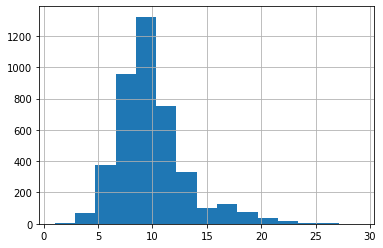

In [14]:
abalone["Rings"].hist(bins=15)
plt.show()

**correlation calculation to find which variables mostly affect or helpul to determine dependent variable**

In [15]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]  # more the value of independent variable closer to 1 more the value is correlated to the dependent variable

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

**X represents independent variables and y represents dependent variables**

In [16]:
X = abalone.iloc[:,:-1].values
y = abalone.iloc[:,-1].values

In [19]:
new_data_point = np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526, 0.291208, ]) # the data point whose value to be calculated
k = 3 # number of nearest neighbours to be considered
distances = np.linalg.norm(X - new_data_point, axis=1)   # linalg.norm() to calculate the eucledian distance between two data points
nearest_neighbor_ids = distances.argsort()[:k]  # argsort() to get the indices of k nearest neighbours to the new data point
nearest_neighbor_ids

array([4045, 1902, 1644])

**as the outcome to be predicted is numeric we use mean() when we need to predict class to which the outcome belongs in such case we use mode()** 

In [22]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings.mean()   # so the new_data_point falls into category of alabone with 10 rings

10.0

**using sklearn library and implementing knn classification**

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=12345)    # splitting dataset into train and test 

In [25]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3)

In [28]:
regressor.fit(X_train, y_train)  # trian the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [34]:
regressor.predict([[0.569552,0.446407,0.154437,1.016849,0.439051,0.222526, 0.291208, ]])  # predicting the new_data_variable

array([10.])

In [37]:
regressor.predict(X_test)  # predict complete test set

array([15.66666667, 11.        ,  8.66666667, 11.66666667,  9.66666667,
        9.66666667,  9.        ,  9.        , 11.66666667, 11.33333333,
        8.33333333,  9.        , 14.66666667,  9.33333333, 14.        ,
        9.33333333, 11.        , 10.        , 10.66666667, 15.66666667,
       10.33333333,  7.33333333, 10.33333333, 10.66666667, 10.33333333,
        8.33333333,  9.33333333,  8.33333333,  9.66666667, 14.        ,
       11.33333333, 11.66666667, 13.        ,  9.66666667,  7.66666667,
        9.66666667,  8.66666667,  6.33333333,  7.        ,  9.66666667,
       12.        ,  9.        , 10.66666667, 18.        ,  8.        ,
        9.66666667, 13.33333333,  9.66666667,  6.        ,  9.33333333,
        9.66666667,  9.        , 11.66666667,  9.33333333,  9.        ,
       12.66666667,  7.        , 11.33333333,  9.66666667, 10.33333333,
       10.        ,  7.        ,  7.        , 10.        , 18.66666667,
       12.        ,  9.66666667, 11.66666667,  8.66666667, 10.33

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_train_pred = regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
y_test_pred = regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
print(train_rmse)
print(test_rmse)

1.653705966446084
2.375417924000521


In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}   # gridsearchcv automatically fits model with neighbours values ranging from 1 to 50 and then gives best value of k 
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [44]:
gridsearch.best_params_  # 25 is the best value to use obatined from gridsearchcv

{'n_neighbors': 25}

In [45]:
regressor = KNeighborsRegressor(n_neighbors=25)
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
y_test_pred = regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
print(train_rmse)
print(test_rmse)

2.0731294674202143
2.1700197339962175


In [46]:
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
regressor = KNeighborsRegressor(n_neighbors=25,weights='distance')
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)
y_test_pred = regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)
print(train_rmse)
print(test_rmse)

0.0
2.163426558494748


In [54]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(regressor, n_estimators=100)  # bagging is an ensemble learning method 
bagging_model.fit(X_train,y_train)
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1660699851086447